# Logistic Regression

This notebook will discuss the Logistic Regression algorithm to solve a classification problem. We will be discussing theory first and then move on to a practical example.

It's inspired by the IBM's Machine Learning with Python course.

# What is Logistic Regression

Logistic Regression is an algorithm that is used in classification problems. 

## Difference from Linear Regression

It is different from Linear Regression because it uses a sigmoid function instead of a linear line. While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point.

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, **y**, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork-20718538&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">

The objective of **Logistic Regression** algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


## Advantages

* **One of the simplest** machine learning algorithms and is easy to implement yet provides great training efficiency in some cases. 

* **Doesn't require high computation power**.

* The predicted parameters (trained weights) **give inference about the importance of each feature.** The direction of association i.e. positive or negative is also given. So we can use logistic regression to find out the relationship between the features.

* Allows models to be **updated easily to reflect new data**, unlike decision trees or support vector machines. The update can be done using stochastic gradient descent.

* Logistic Regression **outputs well-calibrated probabilities** along with classification results. This is an advantage over models that only give the final classification as results.

* In a **low dimensional dataset** having a sufficient number of training examples, logistic regression is **less prone to over-fitting**.

* Rather than straight away starting with a complex model, logistic regression is sometimes **used as a benchmark model to measure performance**, as it is relatively quick and easy to implement.

* Logistic Regression proves to be **very efficient when the dataset has features that are linearly separable.**

* This algorithm **can easily be extended to multi-class classification** using a softmax classifier, this is known as Multinomial Logistic Regression.

## Disadvantages

* **Logistic regression fails to predict a continuous outcome.**

* **On high dimensional datasets**, this may lead to the model being **over-fit** on the training set. This usually happens in the case when the model is trained on **little training data with lots of features**. So on high dimensional datasets, **Regularization techniques should be considered** to avoid over-fitting (but this makes the model complex). Very high regularization factors may even lead to the model being under-fit on the training data.

* **Non linear problems can't be solved** with logistic regression since it has a linear decision surface. Linearly separable data is rarely found in real world scenarios. So the transformation of non linear features is required which can be done by increasing the number of features such that the data becomes linearly separable in higher dimensions.

* It is **difficult to capture complex relationships** using logistic regression. More powerful and complex algorithms such as Neural Networks can easily outperform this algorithm.

* Logistic Regression **requires moderate or no multicollinearity** between independent variables. Multicollinearity can be removed using dimensionality reduction techniques.

* In Linear Regression independent and dependent variables should be related linearly. But Logistic Regression **requires that independent variables are linearly related to the log odds** (log(p/(1-p)).

* **Only important and relevant features should be used** to build a model otherwise the probabilistic predictions made by the model may be incorrect and the model's predictive value may degrade.

* The presence of data values that deviate from the expected range in the dataset may lead to incorrect results as this algorithm is **sensitive to outliers.**

* Logistic Regression **requires a large dataset** and also sufficient training examples for all the categories it needs to identify.

# Creating the Model. Practical Example: Customer churn with Logistic Regression

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out who is leaving and why.


Lets first import required libraries:


In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

## About the dataset

We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

-   Customers who left within the last month – the column is called Churn
-   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
-   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
-   Demographic info about customers – gender, age range, and if they have partners and dependents


## Load the Telco Churn data

In [2]:
churn_df = pd.read_csv("Datasets/Telecom Churn.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="preprocessing">Data pre-processing and selection</h2>


Lets select some features for the modeling. Also we change the target data type to be integer, as it is a requirement  by the skitlearn algorithm:


In [3]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'callcard', 'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


Lets define X, and y for our dataset:


In [4]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ',
                         'equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [5]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

Also, we normalize the dataset:


In [6]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

## Train/Test dataset


Okay, we split our dataset into train and test set:


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


<h2 id="modeling">Modeling (Logistic Regression with Scikit-learn)</h2>


Lets build our model using **LogisticRegression** from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. You can find extensive information about the pros and cons of these optimizers if you search it in internet.

**NOTE:** The version of Logistic Regression in Scikit-learn, support regularization *By default*. Regularization is a technique used to solve the overfitting problem in machine learning models.

Now lets fit our model with train set:

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression().fit(X_train, y_train)  # C = 0,01
LR

LogisticRegression()

Now we can predict using our test set:


In [9]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

## Getting Probablility for the class

**predict_proba**  returns estimates for all classes, ordered by the label of classes. So, the first column is the probability of class 0, P(Y=0|X), and second column is probability of class 1, P(Y=1|X):

In [10]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.74658429, 0.25341571],
       [0.92677899, 0.07322101],
       [0.83445726, 0.16554274],
       [0.94596742, 0.05403258],
       [0.84351139, 0.15648861],
       [0.71452329, 0.28547671],
       [0.77085785, 0.22914215],
       [0.90956492, 0.09043508],
       [0.26142925, 0.73857075],
       [0.94907369, 0.05092631],
       [0.84772942, 0.15227058],
       [0.89315103, 0.10684897],
       [0.57506834, 0.42493166],
       [0.32555873, 0.67444127],
       [0.91995311, 0.08004689],
       [0.633071  , 0.366929  ],
       [0.6297197 , 0.3702803 ],
       [0.71293143, 0.28706857],
       [0.64068923, 0.35931077],
       [0.7794542 , 0.2205458 ],
       [0.91593448, 0.08406552],
       [0.64123809, 0.35876191],
       [0.96435248, 0.03564752],
       [0.55216187, 0.44783813],
       [0.62291087, 0.37708913],
       [0.97603043, 0.02396957],
       [0.6014112 , 0.3985888 ],
       [0.68062074, 0.31937926],
       [0.71779212, 0.28220788],
       [0.9820836 , 0.0179164 ],
       [0.

<h2 id="evaluation">Evaluation</h2>


### Jaccard Index

Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [11]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat, pos_label=0)

0.6944444444444444

### Confusion Matrix

Another way of looking at accuracy of classifier is to look at **confusion matrix**.

In the matrix $C_{i,j}$ is equal to the number of observations known to be in group *i* and predicted to be in group *j*.

To get the confusion matrix, we would be using `confusion_matrix` from `sklearn.metrics`

In [12]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, yhat, labels=[1, 0])

cnf_matrix

array([[ 4, 11],
       [ 0, 25]], dtype=int64)

Now let's plot it.

<AxesSubplot:xlabel='Predicted Values', ylabel='True Values'>

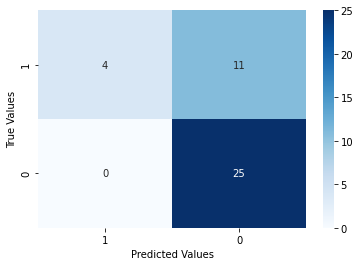

In [13]:
labels = [1, 0]
df_cm = pd.DataFrame(cnf_matrix, index=labels, columns=labels)
df_cm.rename_axis("True Values", inplace=True)
df_cm.rename_axis("Predicted Values", axis="columns", inplace=True)
sns.heatmap(df_cm, annot=True, cmap='Blues')

Look at first row. The first row is for customers whose actual churn value in test set is 1.
As you can calculate, out of 40 customers, the churn value of 15 of them is 1. 
And out of these 15, the classifier correctly predicted 4 of them as 1, and 11 of them as 0. 

It means, for 4 customers, the actual churn value were 1 in test set, and classifier also correctly predicted those as 1. However, while the actual label of 11 customers were 1, the classifier predicted those as 0, which is not very good. We can consider it as error of the model for first row.

What about the customers with churn value 0? Lets look at the second row.
It looks like  there were 25 customers whom their churn value were 0. 

The classifier correctly predicted 24 of them as 0, and one of them wrongly as 1. So, it has done a good job in predicting the customers with churn value 0. A good thing about confusion matrix is that shows the model’s ability to correctly predict or separate the classes.  In specific case of binary classifier, such as this example,  we can interpret these numbers as the count of true positives, false positives, true negatives, and false negatives.

### Classification Report

Now, we would get the classification report that will give us some important metrics for our classifier.

In [14]:
from sklearn.metrics import classification_report

In [15]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       1.00      0.27      0.42        15

    accuracy                           0.73        40
   macro avg       0.85      0.63      0.62        40
weighted avg       0.81      0.72      0.67        40



Based on the count of each section, we can calculate precision and recall of each label:

-   **Precision** is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

-   **Recall** is true positive rate. It is defined as: Recall =  TP / (TP + FN)

So, we can calculate precision and recall of each class.

**F1 score:**
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.

And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.


# Author
By Abhinav Garg